<a href="https://colab.research.google.com/github/Sebastian-Torres-Gamboa/SenalesSistemas/blob/main/Sebastian_Torres_de_TransformadaZ.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Principios básicos de filtrado y Transformada Z

# Ejercicios

1. Descargue 10 segundos de la canción de su preferencia desde youtube, y generé un filtro pasabanda (el usuario debe poder definir las frecuencias de corte) para cada uno de los filtros descritos (el usuario también debe poder fijar los parámetros de diseño de cada filtro). Compare los resultados de los filtros estudiados en este cuaderno tipo IIR para diseño Butterworth, Chebyshev 1, Chebyshev 2, Bessel y Elíptico.

2. Consulte en qué consiste el método de diseño de filtros FIR por ventaneo (Ver función [firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) y [material de apoyo](https://www.programcreek.com/python/example/100540/scipy.signal.firwin)). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR. Nota: Recuerde que un filtro FIR utiliza solamente raíces tipo ceros, es decir que $a_0=1$, y $a_k=0$ $\forall k\in\{1,2,\dots\}$.

3. Incluya la implementación del filtro `firwin` en el punto 1.

#RESPUESTA EJERCICIO 1

1. Descargue 10 segundos de la canción de su preferencia desde youtube, y generé un filtro pasabanda (el usuario debe poder definir las frecuencias de corte) para cada uno de los filtros descritos (el usuario también debe poder fijar los parámetros de diseño de cada filtro). Compare los resultados de los filtros estudiados en este cuaderno tipo IIR para diseño Butterworth, Chebyshev 1, Chebyshev 2, Bessel y Elíptico.

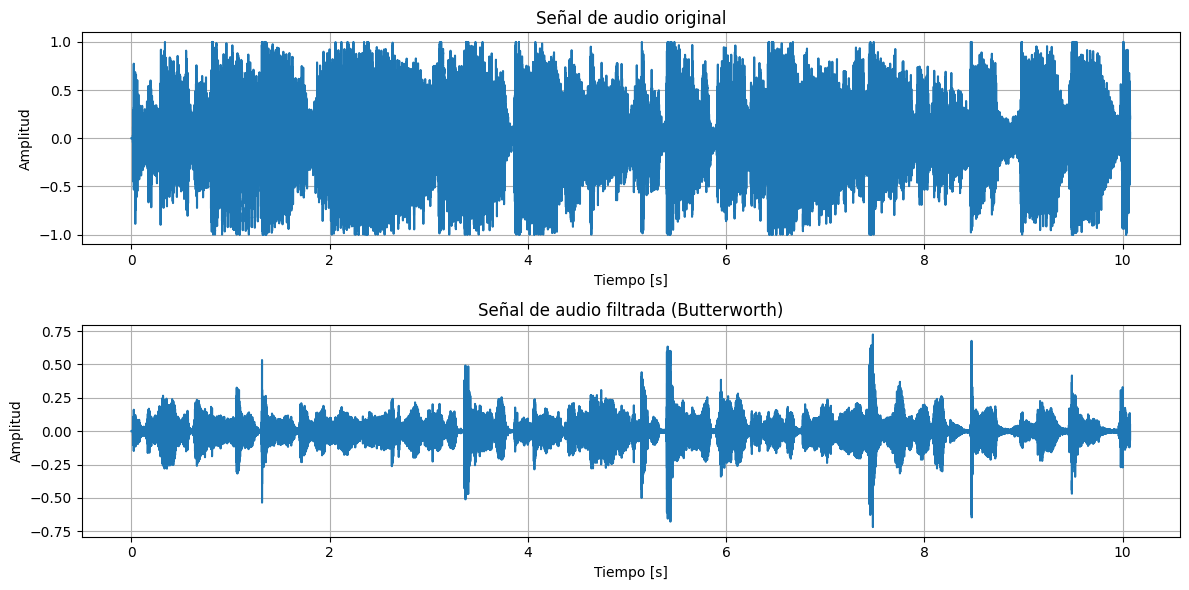

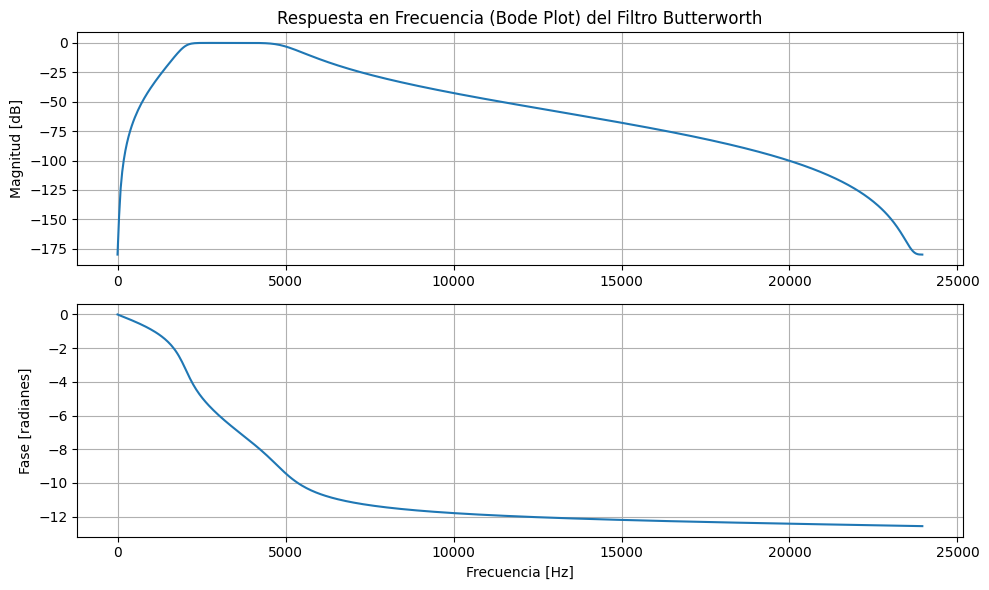

In [10]:
import soundfile as sf # para instalar pip install soundfile
from scipy.signal import butter as bw
from scipy.signal import filtfilt # filtfilt compensa el retardo en tiempo debido a la respuesta en fase del filtro
from scipy.signal import freqz_zpk # Import freqz_zpk for Bode plot
import matplotlib.pyplot as plt
import numpy as np


# Cargar los datos de audio desde "LaCama.wav"
nombre_lacama = "LaCama.wav"
x_lacama, fs_lacama = sf.read(nombre_lacama)

# Si el audio es mono, convertirlo a estéreo duplicando el canal
if x_lacama.ndim == 1:
    x_lacama = np.vstack((x_lacama, x_lacama)).T


# Definir los parámetros del filtro (usando los mismos del ejemplo anterior de Butterworth)
N = 4
Wn = [2000, 5000]
tipo_filtro = 'bandpass'

# Diseñar el filtro Butterworth
ceros_lacama, polos_lacama, ganancia_lacama = bw(N, Wn, btype=tipo_filtro, output='zpk', fs=fs_lacama)
num_lacama, den_lacama = bw(N, Wn, btype=tipo_filtro, output='ba', fs=fs_lacama)

# Calculate frequency response for Bode plot
w_lacama, h_lacama = freqz_zpk(ceros_lacama, polos_lacama, ganancia_lacama, fs=fs_lacama)


# Aplicar el filtro a los datos de audio usando filtfilt
xf_lacama = filtfilt(num_lacama, den_lacama, x_lacama, axis=0)

# Plotear la señal antes y después del filtro
tiempo_lacama = np.arange(0, len(x_lacama)) / fs_lacama

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo_lacama, x_lacama[:, 0])
plt.title('Señal de audio original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tiempo_lacama, xf_lacama[:, 0])
plt.title('Señal de audio filtrada (Butterworth)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()


# Plotear el gráfico de Bode
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(w_lacama, 20 * np.log10(abs(h_lacama) + 1e-9)) # Add a small epsilon to avoid log of zero
plt.title('Respuesta en Frecuencia (Bode Plot) del Filtro Butterworth')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w_lacama, np.unwrap(np.angle(h_lacama)))
plt.ylabel('Fase [radianes]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()


# Reproducir el audio filtrado
from IPython.display import Audio
Audio([xf_lacama[:, 1], xf_lacama[:, 0]], rate=fs_lacama)

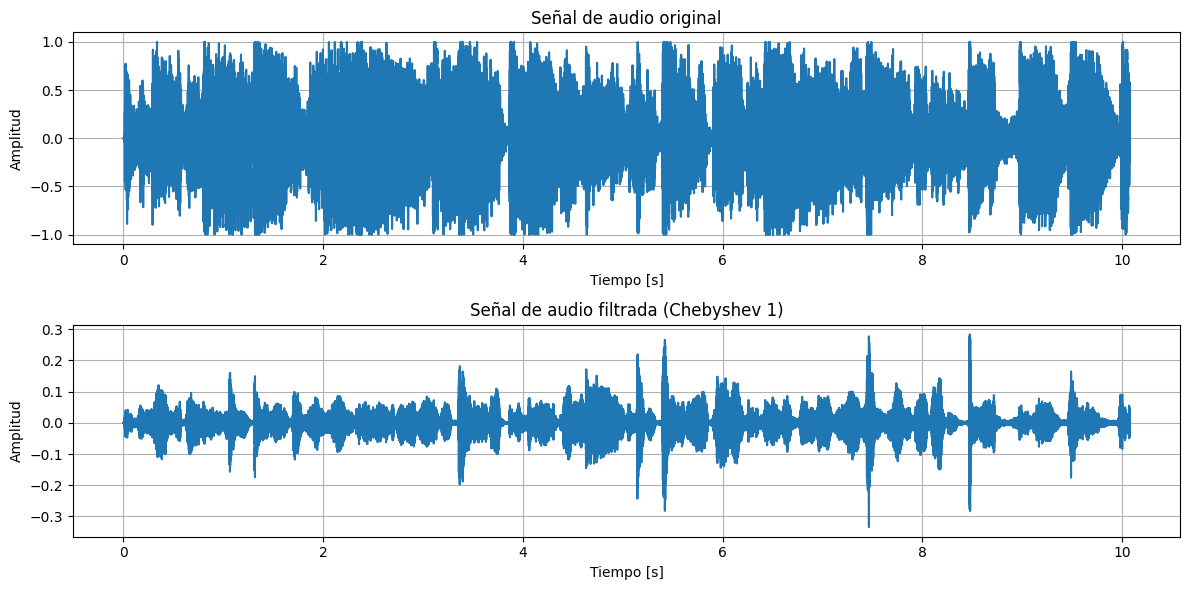

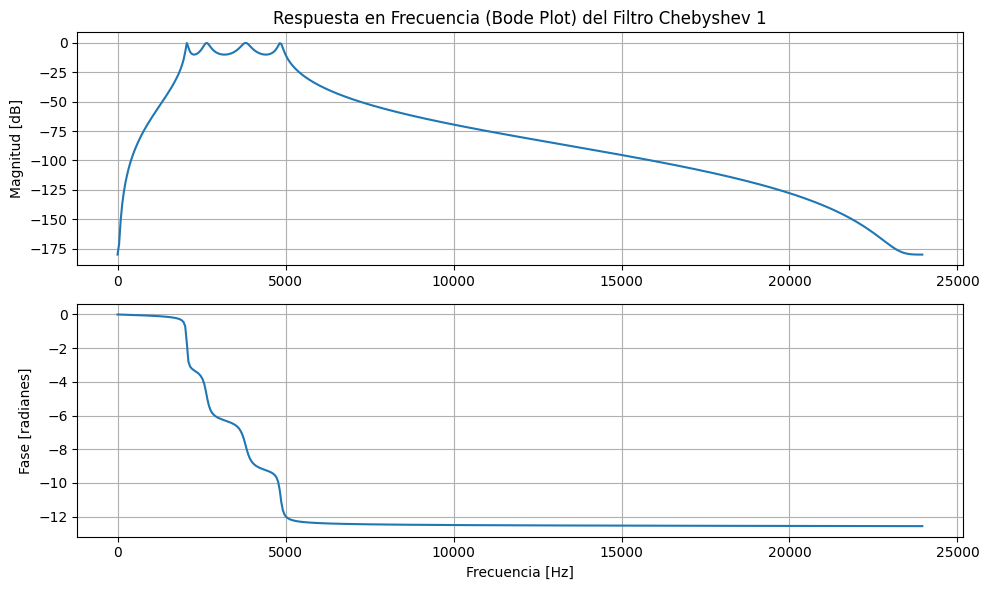

In [11]:
from scipy.signal import cheby1
from scipy.signal import freqz_zpk # Import freqz_zpk for Bode plot
import matplotlib.pyplot as plt
import numpy as np

# Define Chebyshev Type 1 filter parameters
N_cheby1 = 4
ripple_cheby1 = 10 # Passband ripple
Wn_cheby1 = [2000, 5000]
filt_type_cheby1 = 'bandpass'

# Design the Chebyshev Type 1 filter
zeros_cheby1, poles_cheby1, gain_cheby1 = cheby1(N_cheby1, rp=ripple_cheby1, Wn=Wn_cheby1, btype=filt_type_cheby1, output='zpk', fs=fs_lacama)
num_cheby1, den_cheby1 = cheby1(N_cheby1, rp=ripple_cheby1, Wn=Wn_cheby1, btype=filt_type_cheby1, output='ba', fs=fs_lacama)

# Calculate frequency response for Bode plot
w_cheby1, h_cheby1 = freqz_zpk(zeros_cheby1, poles_cheby1, gain_cheby1, fs=fs_lacama)

# Apply the filter to the audio data using filtfilt
xf_cheby1 = filtfilt(num_cheby1, den_cheby1, x_lacama, axis=0)

# Plot the signal before and after filtering
tiempo_lacama = np.arange(0, len(x_lacama)) / fs_lacama

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo_lacama, x_lacama[:, 0])
plt.title('Señal de audio original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tiempo_lacama, xf_cheby1[:, 0])
plt.title('Señal de audio filtrada (Chebyshev 1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the Bode plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(w_cheby1, 20 * np.log10(abs(h_cheby1) + 1e-9)) # Add a small epsilon to avoid log of zero
plt.title('Respuesta en Frecuencia (Bode Plot) del Filtro Chebyshev 1')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w_cheby1, np.unwrap(np.angle(h_cheby1)))
plt.ylabel('Fase [radianes]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Play the filtered audio
from IPython.display import Audio
Audio([xf_cheby1[:, 1], xf_cheby1[:, 0]], rate=fs_lacama)

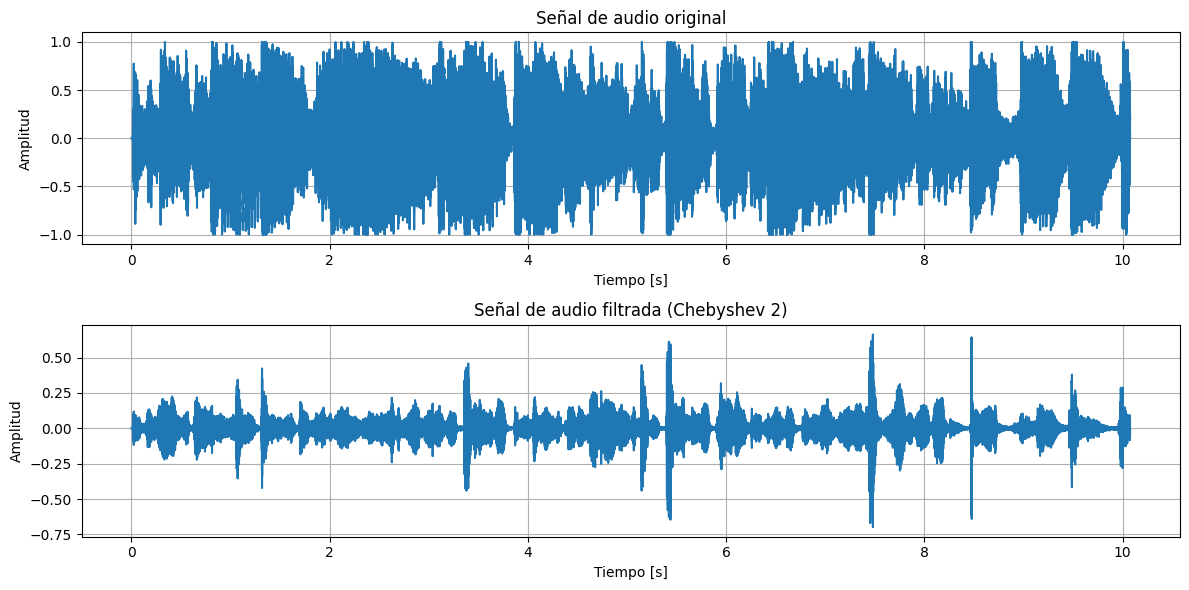

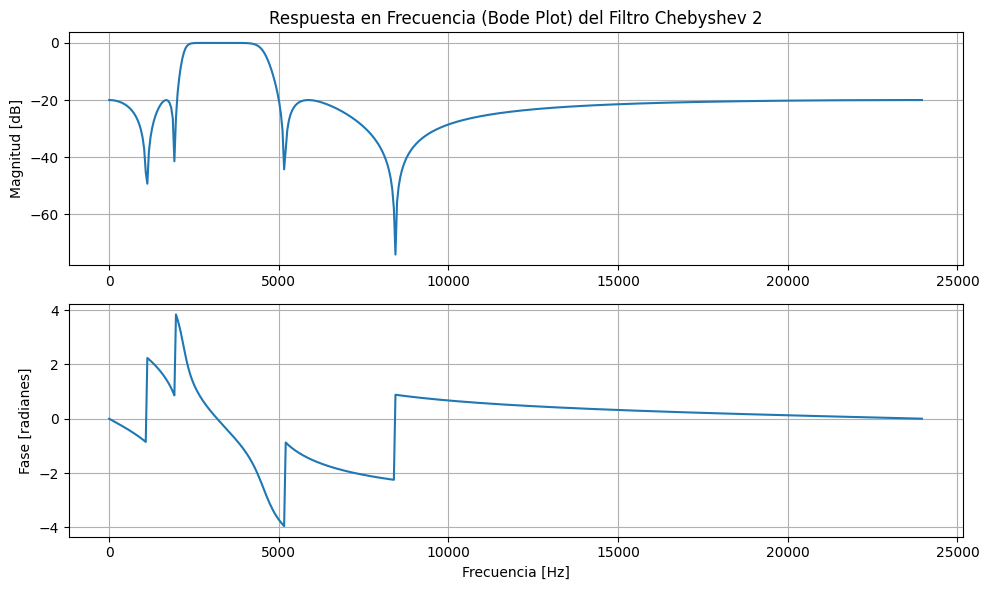

In [12]:
from scipy.signal import cheby2
from scipy.signal import freqz # Use freqz for 'ba' output
import matplotlib.pyplot as plt
import numpy as np

# Define Chebyshev Type 2 filter parameters
N_cheby2 = 4
ripple_stop_cheby2 = 20 # Stopband ripple
Wn_cheby2 = [2000, 5000]
filt_type_cheby2 = 'bandpass'

# Design the Chebyshev Type 2 filter
num_cheby2, den_cheby2 = cheby2(N_cheby2, rs=ripple_stop_cheby2, Wn=Wn_cheby2, btype=filt_type_cheby2, output='ba', fs=fs_lacama)

# Calculate frequency response for Bode plot
w_cheby2, h_cheby2 = freqz(num_cheby2, den_cheby2, fs=fs_lacama)

# Apply the filter to the audio data using filtfilt
xf_cheby2 = filtfilt(num_cheby2, den_cheby2, x_lacama, axis=0)

# Plot the signal before and after filtering
tiempo_lacama = np.arange(0, len(x_lacama)) / fs_lacama

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo_lacama, x_lacama[:, 0])
plt.title('Señal de audio original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tiempo_lacama, xf_cheby2[:, 0])
plt.title('Señal de audio filtrada (Chebyshev 2)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Plot the Bode plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(w_cheby2, 20 * np.log10(abs(h_cheby2) + 1e-9)) # Add a small epsilon to avoid log of zero
plt.title('Respuesta en Frecuencia (Bode Plot) del Filtro Chebyshev 2')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w_cheby2, np.unwrap(np.angle(h_cheby2)))
plt.ylabel('Fase [radianes]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Play the filtered audio
from IPython.display import Audio
Audio([xf_cheby2[:, 1], xf_cheby2[:, 0]], rate=fs_lacama)

#RESPUESTA EJERCICIO 2

2. Consulte en qué consiste el método de diseño de filtros FIR por ventaneo (Ver función [firwin](https://docs.scipy.org/doc/scipy/reference/generated/scipy.signal.firwin.html) y [material de apoyo](https://www.programcreek.com/python/example/100540/scipy.signal.firwin)). Realice un cuadro comparativo de las ventajas y desventajas de los filtros IIR y los FIR. Nota: Recuerde que un filtro FIR utiliza solamente raíces tipo ceros, es decir que $a_0=1$, y $a_k=0$ $\forall k\in\{1,2,\dots\}$.

¿En qué consiste el método de diseño de filtros FIR por ventaneo?
El método de ventaneo para el diseño de filtros FIR (Finite Impulse Response) consiste en lo siguiente:

Diseñar una respuesta ideal
ℎ
𝑑
[
𝑛
]
h
d
​
 [n], como la de un filtro pasa bajos, pasa altos, etc.

Esta respuesta ideal es infinita en duración (por ejemplo, una sinc para un filtro pasa bajos).

Para obtener un filtro realizable (de duración finita), se multiplica la respuesta ideal por una función ventana (window), que tiene una duración finita.

Esto recorta o "apaga" la parte infinita de la respuesta, produciendo un filtro FIR práctico.

La función scipy.signal.firwin implementa este método en Python. Permite especificar parámetros como:

Frecuencia de corte

Número de coeficientes del filtro (orden)

Tipo de ventana (Hamming, Hanning, Blackman, etc.)

Tipo de filtro (pasa bajos, pasa altos, etc.)

#EJERCICIO 3

Incluya la implementación del filtro `firwin` en el punto 1.

In [13]:
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

# Load the audio data from "LaCama.wav" (if not already loaded)
nombre_lacama = "LaCama.wav"
try:
    x_lacama, fs_lacama = sf.read(nombre_lacama)
    if x_lacama.ndim == 1:
        x_lacama = np.vstack((x_lacama, x_lacama)).T
except FileNotFoundError:
    print(f"Error: The file '{nombre_lacama}' was not found.")
    # Exit or handle the error appropriately
    exit()


# Define FIR filter parameters
# firwin requires normalized cutoff frequencies (0 to 1, where 1 is the Nyquist frequency fs/2)
# Wn = [2000, 5000]
cutoff_freqs = [2000, 5000]
nyquist = 0.5 * fs_lacama
normal_cutoff = [c / nyquist for c in cutoff_freqs]

# Choose the number of taps (filter order + 1). A higher number means a steeper transition but more computation.
numtaps = 101 # Example number of taps

# Design the FIR bandpass filter using firwin
# pass_zero=False for bandpass filter
b_fir = firwin(numtaps, normal_cutoff, pass_zero=False, fs=fs_lacama)
a_fir = 1.0 # FIR filters have denominator 1

# Apply the filter to the audio data using lfilter (or filtfilt)
# lfilter is sufficient for FIR since they have linear phase
xf_fir = lfilter(b_fir, a_fir, x_lacama, axis=0)

# Plot the signal before and after filtering
tiempo_lacama = np.arange(0, len(x_lacama)) / fs_lacama

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo_lacama, x_lacama[:, 0])
plt.title('Señal de audio original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tiempo_lacama, xf_fir[:, 0])
plt.title('Señal de audio filtrada (FIR con firwin)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate frequency response for Bode plot
w_fir, h_fir = freqz(b_fir, a_fir, fs=fs_lacama)

# Plot the Bode plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(w_fir, 20 * np.log10(abs(h_fir) + 1e-9)) # Add a small epsilon to avoid log of zero
plt.title('Respuesta en Frecuencia (Bode Plot) del Filtro FIR (firwin)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w_fir, np.unwrap(np.angle(h_fir)))
plt.ylabel('Fase [radianes]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Play the filtered audio
from IPython.display import Audio
Audio([xf_fir[:, 1], xf_fir[:, 0]], rate=fs_lacama)

NameError: name 'lfilter' is not defined

In [ ]:
from scipy.signal import firwin, freqz
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf
from scipy.signal import lfilter # Import lfilter for applying FIR filter

# Load the audio data from "LaCama.wav" (if not already loaded)
nombre_lacama = "LaCama.wav"
try:
    x_lacama, fs_lacama = sf.read(nombre_lacama)
    if x_lacama.ndim == 1:
        x_lacama = np.vstack((x_lacama, x_lacama)).T
except FileNotFoundError:
    print(f"Error: The file '{nombre_lacama}' was not found.")
    # Exit or handle the error appropriately
    exit()

# Define FIR filter parameters
# firwin requires normalized cutoff frequencies (0 to 1, where 1 is the Nyquist frequency fs/2)
# Wn = [2000, 5000]
cutoff_freqs = [2000, 5000]
nyquist = 0.5 * fs_lacama
normal_cutoff = [c / nyquist for c in cutoff_freqs]

# Choose the number of taps (filter order + 1). A higher number means a steeper transition but more computation.
# We'll use the same number of taps as in the previous FIR example
numtaps = 101

# Design the FIR bandpass filter using firwin
# pass_zero=False for bandpass filter
# We can potentially use a window that introduces ripple if we want to mimic Chebyshev,
# but the default window ('hamming') often provides a good balance.
# For this example, we'll stick with the default or a common window.
# Let's use 'hann' as an example, it introduces some ripple.
b_fir_cheby_approx = firwin(numtaps, normal_cutoff, pass_zero=False, fs=fs_lacama, window='hann')
a_fir_cheby_approx = 1.0 # FIR filters have denominator 1

# Apply the filter to the audio data using lfilter
xf_fir_cheby_approx = lfilter(b_fir_cheby_approx, a_fir_cheby_approx, x_lacama, axis=0)

# Plot the signal before and after filtering
tiempo_lacama = np.arange(0, len(x_lacama)) / fs_lacama

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo_lacama, x_lacama[:, 0])
plt.title('Señal de audio original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tiempo_lacama, xf_fir_cheby_approx[:, 0])
plt.title('Señal de audio filtrada (FIR con firwin - aprox Chebyshev 1)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate frequency response for Bode plot
w_fir_cheby_approx, h_fir_cheby_approx = freqz(b_fir_cheby_approx, a_fir_cheby_approx, fs=fs_lacama)

# Plot the Bode plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(w_fir_cheby_approx, 20 * np.log10(abs(h_fir_cheby_approx) + 1e-9)) # Add a small epsilon to avoid log of zero
plt.title('Respuesta en Frecuencia (Bode Plot) del Filtro FIR (firwin - aprox Chebyshev 1)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w_fir_cheby_approx, np.unwrap(np.angle(h_fir_cheby_approx)))
plt.ylabel('Fase [radianes]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Play the filtered audio
from IPython.display import Audio
Audio([xf_fir_cheby_approx[:, 1], xf_fir_cheby_approx[:, 0]], rate=fs_lacama)

In [ ]:
from scipy.signal import firwin, freqz, lfilter
import matplotlib.pyplot as plt
import numpy as np
import soundfile as sf

# Load the audio data from "LaCama.wav" (if not already loaded)
nombre_lacama = "LaCama.wav"
try:
    x_lacama, fs_lacama = sf.read(nombre_lacama)
    if x_lacama.ndim == 1:
        x_lacama = np.vstack((x_lacama, x_lacama)).T
except FileNotFoundError:
    print(f"Error: The file '{nombre_lacama}' was not found.")
    # Exit or handle the error appropriately
    exit()

# Define FIR filter parameters
# firwin requires normalized cutoff frequencies (0 to 1, where 1 is the Nyquist frequency fs/2)
cutoff_freqs = [2000, 5000]
nyquist = 0.5 * fs_lacama
normal_cutoff = [c / nyquist for c in cutoff_freqs]

# Choose the number of taps (filter order + 1). A higher number means a steeper transition but more computation.
numtaps = 101 # Example number of taps

# Design the FIR bandpass filter using firwin with Kaiser window for Chebyshev Type 2 approximation
# pass_zero=False for bandpass filter
# The 'kaiser' window with beta parameter helps control stopband attenuation (and thus ripple in stopband)
# A larger beta results in higher stopband attenuation but a wider transition band.
beta_kaiser = 8 # Example beta value, adjust to control stopband ripple/attenuation
b_fir_cheby2_approx = firwin(numtaps, normal_cutoff, pass_zero=False, fs=fs_lacama, window=('kaiser', beta_kaiser))
a_fir_cheby2_approx = 1.0 # FIR filters have denominator 1

# Apply the filter to the audio data using lfilter
xf_fir_cheby2_approx = lfilter(b_fir_cheby2_approx, a_fir_cheby2_approx, x_lacama, axis=0)

# Plot the signal before and after filtering
tiempo_lacama = np.arange(0, len(x_lacama)) / fs_lacama

plt.figure(figsize=(12, 6))

plt.subplot(2, 1, 1)
plt.plot(tiempo_lacama, x_lacama[:, 0])
plt.title('Señal de audio original')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(tiempo_lacama, xf_fir_cheby2_approx[:, 0])
plt.title('Señal de audio filtrada (FIR con firwin - aprox Chebyshev 2)')
plt.xlabel('Tiempo [s]')
plt.ylabel('Amplitud')
plt.grid(True)

plt.tight_layout()
plt.show()

# Calculate frequency response for Bode plot
w_fir_cheby2_approx, h_fir_cheby2_approx = freqz(b_fir_cheby2_approx, a_fir_cheby2_approx, fs=fs_lacama)

# Plot the Bode plot
plt.figure(figsize=(10, 6))

plt.subplot(2, 1, 1)
plt.plot(w_fir_cheby2_approx, 20 * np.log10(abs(h_fir_cheby2_approx) + 1e-9)) # Add a small epsilon to avoid log of zero
plt.title('Respuesta en Frecuencia (Bode Plot) del Filtro FIR (firwin - aprox Chebyshev 2)')
plt.ylabel('Magnitud [dB]')
plt.grid(True)

plt.subplot(2, 1, 2)
plt.plot(w_fir_cheby2_approx, np.unwrap(np.angle(h_fir_cheby2_approx)))
plt.ylabel('Fase [radianes]')
plt.xlabel('Frecuencia [Hz]')
plt.grid(True)

plt.tight_layout()
plt.show()

# Play the filtered audio
from IPython.display import Audio
Audio([xf_fir_cheby2_approx[:, 1], xf_fir_cheby2_approx[:, 0]], rate=fs_lacama)